In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.segmentation import slic, mark_boundaries, find_boundaries
from skimage.filters import gabor
from skimage.color import rgb2gray, label2rgb
from skimage.measure import regionprops
from scipy.spatial import KDTree
from scipy.spatial.distance import cdist
from tqdm.notebook import tqdm
from joblib import Parallel, delayed

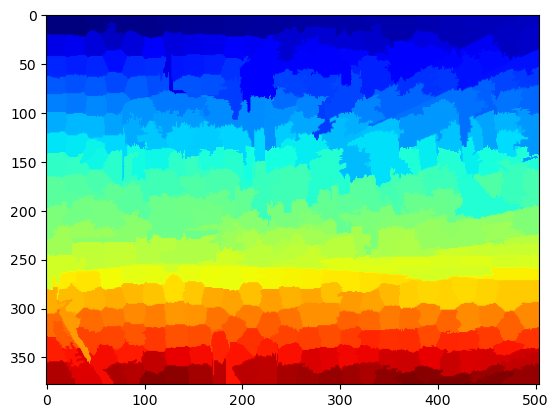

In [7]:
import cv2
from skimage.segmentation import slic
import matplotlib.pyplot as plt
from skimage.util import img_as_float

# Load image
image_path = 'refrence-targets/reference2.png'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Calculate segments based on image size
height, width, _ = image.shape
desired_superpixel_size = 20
num_segments = (height * width) // (desired_superpixel_size ** 2)

# Apply SLIC
target_superpixels = slic(img_as_float(image), n_segments=num_segments, compactness=10)

# Visualize
plt.imshow(target_superpixels, cmap='jet')
plt.show()


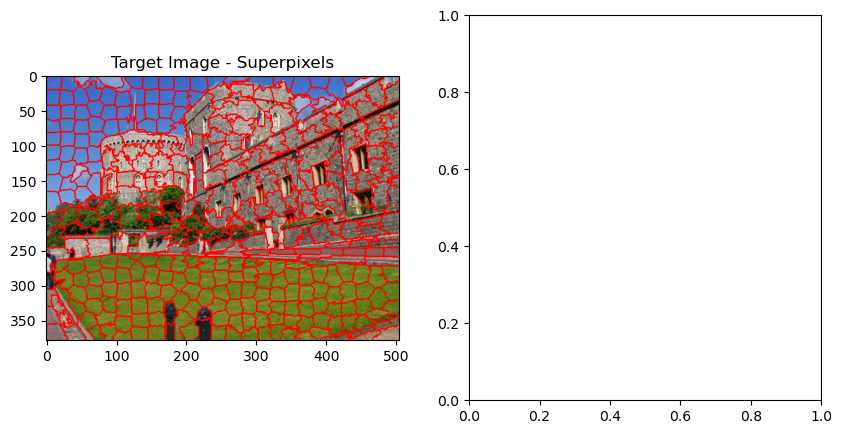

In [8]:
# Display Superpixel Boundaries
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(mark_boundaries(image, target_superpixels, color=(1, 0, 0)))
ax[0].set_title("Target Image - Superpixels")
# ax[1].imshow(mark_boundaries(reference_image, reference_superpixels, color=(1, 0, 0)))
# ax[1].set_title("Reference Image - Superpixels")
plt.show()

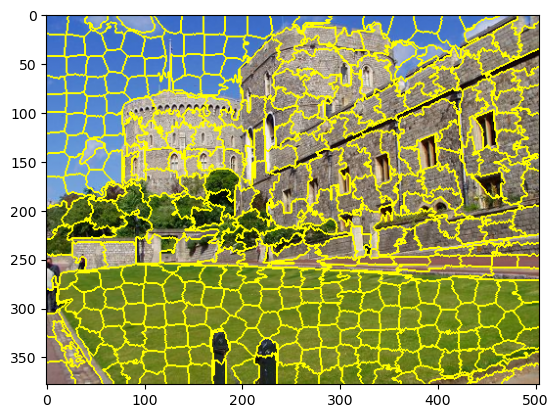

In [9]:
from skimage.segmentation import mark_boundaries

# Merge small segments based on a size threshold
min_size = 30
merged_segments = target_superpixels.copy()
for segment_id in set(target_superpixels.flatten()):
    if (target_superpixels == segment_id).sum() < min_size:
        merged_segments[target_superpixels == segment_id] = -1  # mark for merging

# Visualize merged regions
plt.imshow(mark_boundaries(image, merged_segments))
plt.show()
